* Submit the assignment with roll_number as *roll_number*.ipynb file.

# Task-1 : Implement VGG16 on Food101 dataset.
Your first task would be to implement the VGG16 architecture model class and train a classification model on the Food101 dataset using the above architecture. The details of the dataset are given below.  

### 1.1 Import packages
Some packages are imported. However, you would need to import any other package that is required in the implementation that you feel is required. But do keep in mind, your model shouldn't be imported. It has to be implemented using the basic convolution layers.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)


2024-02-25 14:11:01.097329: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-25 14:11:01.097458: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-25 14:11:01.272118: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### 1.2. Dataset
The Food-101 is a challenging data set of 101 food categories with 101,000 images. All images were rescaled to have a maximum side length of 512 pixels. Implementing the below cell will allow you to download the dataset into your colab directory under ```/data/food-101```.
Inside the directory you would find the information about the dataset and also a ReadMe.txt file.

Now, the image size of the dataset is ```(512,512,3)```. However, the model expects the image to be of the size ```(224,224,3)```. Now using the transforms method, write a composed transformation where you implement the resize as well as convert to tensor function. Do some basic preprocessing as well, Normalisation, Standardization etc. \
Hint : use the ``` transform.Compose() ``` method.




In [2]:
### YOUR CODE STARTS HERE ###
transform = transforms.Compose([
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),

])

### YOUR CODE ENDS HERE ###

In [3]:
# Setup training data
train_data = datasets.Food101(
    root="data",
    split="train", # get training data
    download=True,
    transform=transform
)

# Setup testing data
test_data = datasets.Food101(
    root="data",
    split="test", # get test data
    download=True,
    transform=transform
)

100%|██████████| 4996278331/4996278331 [04:21<00:00, 19098311.68it/s]


Extracting data/food-101.tar.gz to data


For visualization, we randomly select 10 classes of the dataset and plot corresponding images.

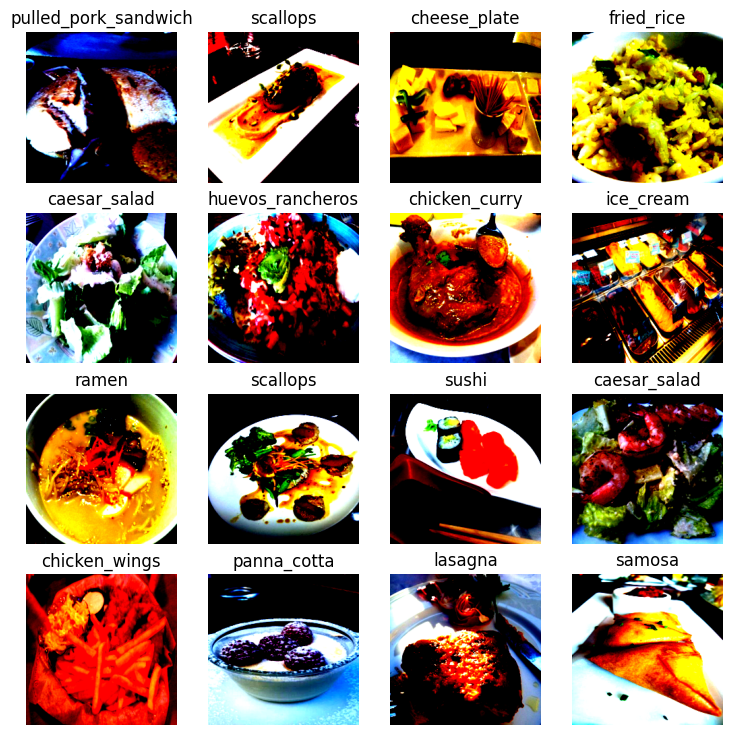

In [4]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
class_names = train_data.classes
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.permute(1, 2, 0))
    plt.title(class_names[label])
    plt.axis(False);

### 1.3. Prepare Dataloader
Now, in the cell below implement the DataLoader function for the train and test data. You then have to print the length of the train and test dataloaders.

In [5]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

### YOUR CODE STARTS HERE ###
train_loader = DataLoader(train_data,batch_size=BATCH_SIZE,shuffle=True)
test_loader = DataLoader(test_data,batch_size=BATCH_SIZE,shuffle=True)

### YOUR CODE ENDS HERE ###



print(f"Length of train dataloader: {len(train_loader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_loader)} batches of {BATCH_SIZE}")

Length of train dataloader: 2368 batches of 32
Length of test dataloader: 790 batches of 32


### 1.4. VGG16 Architecture
Now, create a model class and implement the VGG16 architecture. The architecture layer is as follows :
![Alt text](https://miro.medium.com/v2/resize:fit:1400/format:webp/0*6VP81rFoLWp10FcG)
![Alt text](https://miro.medium.com/v2/resize:fit:1400/format:webp/0*0M8CobXpNwFDCmOQ)

VGG16 takes input tensor size as 224, 244 with 3 RGB channel. It has 13 convolutional layers, 5 Max Pooling layers, and 3 Dense layers which sum up to 21 layers.



Implement the model class in the given cell below. DONOT change the class name as that would be required in the next cell.

In [6]:

### REPLACE WITH YOUR OWN CODE . DONOT CHANGE THE CLASS NAME ###

class VGG16(nn.Module):
    def __init__(self, classes=10):
        super().__init__()
        self.layer_1=nn.Sequential(
            nn.Conv2d(3,64,kernel_size=1,stride=1,padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU()
        )
        self.layer_2=nn.Sequential(
            nn.Conv2d(64,64,kernel_size=1,stride=1,padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        self.layer_3=nn.Sequential(
            nn.Conv2d(64,128,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU()
        )
        self.layer_4=nn.Sequential(
            nn.Conv2d(128,128,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        self.layer_5=nn.Sequential(
            nn.Conv2d(128,256,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU()
        )
        self.layer_6=nn.Sequential(
            nn.Conv2d(256,256,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU()
        )
        self.layer_7=nn.Sequential(
            nn.Conv2d(256,256,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        self.layer_8=nn.Sequential(
            nn.Conv2d(256,512,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU()
        )
        self.layer_9=nn.Sequential(
            nn.Conv2d(512,512,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU()
        )
        self.layer_10=nn.Sequential(
            nn.Conv2d(512,512,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        self.layer_11=nn.Sequential(
            nn.Conv2d(512,512,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU()
        )
        self.layer_12=nn.Sequential(
            nn.Conv2d(512,512,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU()
        )
        self.layer_13=nn.Sequential(
            nn.Conv2d(512,512,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        self.layer_14=nn.Sequential(
            nn.Flatten(),
            nn.Linear(25088,4096),
            nn.ReLU()
        )
        self.layer_15=nn.Sequential(
            nn.Linear(4096,4096),
            nn.ReLU()
        )
        self.layer_16=nn.Sequential(
            nn.Linear(4096, classes)
        )

    def forward(self, x):
      out=self.layer_1(x)
      out=self.layer_2(out)
      out=self.layer_3(out)
      out=self.layer_4(out)
      out=self.layer_5(out)
      out=self.layer_6(out)
      out=self.layer_7(out)
      out=self.layer_8(out)
      out=self.layer_9(out)
      out=self.layer_10(out)
      out=self.layer_11(out)
      out=self.layer_12(out)
      out=self.layer_13(out)
      out=self.layer_14(out)
      out=self.layer_15(out)
      out=self.layer_16(out)
      return out


In [7]:
"""def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device):
    train_loss, train_acc = 0, 0
    model.to(device)
    count=0
    for batch, (X, y) in enumerate(data_loader):
        torch.cuda.empty_cache()
        X, y = X.to(device), y.to(device)
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print(count,end=" ")
        count+=1
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        torch.cuda.empty_cache()
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            test_pred = model(X)
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1)
            )
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc"""

import torch

def train_step(model, data_loader, loss_fn, optimizer, accuracy_fn, device):
    model.to(device)
    model.train()
    train_loss, train_acc = 0, 0

    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #print(batch, end=" ")

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader, model, loss_fn, accuracy_fn, device):
    model.to(device)
    model.eval()
    test_loss, test_acc = 0, 0

    with torch.no_grad():
        torch.cuda.empty_cache()

        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            test_pred = model(X)
            test_loss += loss_fn(test_pred, y).item()
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")
    return test_acc

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

### 1.5. Model Training
Train the above defined model using the following configurations :    
*   #epochs = 5
*   learning rate = 0.05
* loss = cross entropy
* optimizer = Adam\
After training, save the model with the name : ```food101_vgg16_model.pt```



In [8]:
num_classes = 101
num_epochs = 5
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Device: "+str(device))
model = VGG16(num_classes).to(device)
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(),lr=0.00005)
torch.cuda.empty_cache()
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'max_split_size_mb=32'
loss1=[]
### YOUR CODE STARTS HERE ###
for epoch in range(num_epochs):
  print("Epoch: "+str(epoch+1))
  train_step(data_loader=train_loader,
      model=model,
      loss_fn=loss,
      optimizer=optimizer,
      accuracy_fn=accuracy_fn,
      device=device
  )
  loss1.append(test_step(data_loader=test_loader,
      model=model,
      loss_fn=loss,
      accuracy_fn=accuracy_fn,
      device=device
  ))

torch.save(model.state_dict(),"./food101_vgg16_model.pt")
### YOUR CODE ENDS HERE ###

Device: cuda
Epoch: 1
Train loss: 4.04640 | Train accuracy: 8.24%
Test loss: 3.53271 | Test accuracy: 15.68%

Epoch: 2
Train loss: 3.35503 | Train accuracy: 19.70%
Test loss: 2.97944 | Test accuracy: 26.08%

Epoch: 3
Train loss: 2.88714 | Train accuracy: 28.35%
Test loss: 2.62206 | Test accuracy: 33.49%

Epoch: 4
Train loss: 2.50670 | Train accuracy: 36.57%
Test loss: 2.54829 | Test accuracy: 36.08%

Epoch: 5
Train loss: 2.17088 | Train accuracy: 43.79%
Test loss: 2.33877 | Test accuracy: 40.24%



### 1.6. Evaluate the model
Load the trained model and evaluate on the test data.

In [9]:
### YOUR CODE STARTS HERE ###
model = VGG16(num_classes).to(device)
model.load_state_dict(torch.load("./food101_vgg16_model.pt"))
loss = nn.CrossEntropyLoss()
#optimizer = torch.optim.Adam(params=model.parameters(),lr=0.00005)
torch.cuda.empty_cache()
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'max_split_size_mb=32'
test_step(data_loader=test_loader,
      model=model,
      loss_fn=loss,
      accuracy_fn=accuracy_fn,
      device=device
)


Test loss: 2.33763 | Test accuracy: 40.18%



40.17800632911393

# Task-2 : Finetuning VGG16
In this task, you would use the concept of transfer learning to train a pretrained model of VGG16 on the Food101 dataset. You would use the pretrained model of vgg16 from the pytorch library and use a classification head having the number of classes same as given in the dataset(as like above). Use cross entropy loss and SGD optimizer to train on the training data. Report the accuracy measure of the previous model (from scratch) and this finetuned version. Prepare a graph showing the accuracy of the models.

Device: cuda


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 172MB/s]


Epoch: 1
Train loss: 3.88025 | Train accuracy: 21.18%
Test loss: 2.77367 | Test accuracy: 39.22%

Epoch: 2
Train loss: 2.38260 | Train accuracy: 45.19%
Test loss: 1.96697 | Test accuracy: 51.00%

Epoch: 3
Train loss: 1.90201 | Train accuracy: 53.66%
Test loss: 1.74671 | Test accuracy: 54.78%

Epoch: 4
Train loss: 1.66319 | Train accuracy: 58.87%
Test loss: 1.62873 | Test accuracy: 57.56%

Epoch: 5
Train loss: 1.48890 | Train accuracy: 62.89%
Test loss: 1.57034 | Test accuracy: 58.64%



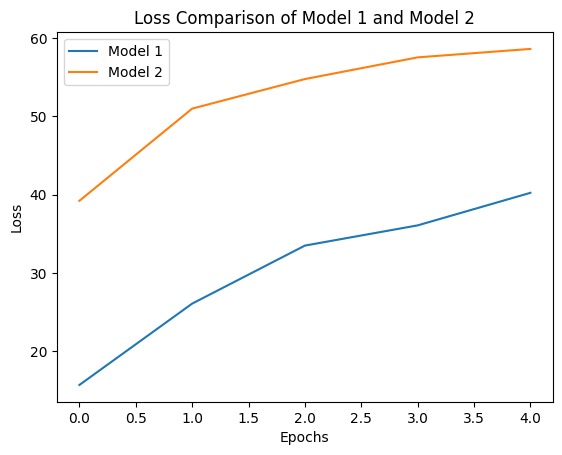

In [10]:
### YOUR CODE STARTS HERE ###
from torchvision import models

class my_vgg16(nn.Module):
  def __init__(self,num_classes):
    super().__init__()
    vgg16 = models.vgg16(pretrained=True)
    vgg16.classifier = nn.Sequential()
    feature = vgg16.features
    my_classifier = nn.Sequential(
        nn.Linear(512 * 7 * 7, 4096),  # You may adjust the input size based on your needs
        nn.ReLU(inplace=True),
        nn.Linear(4096, 4096),
        nn.ReLU(inplace=True),
        nn.Linear(4096, num_classes)
    )
    for param in feature.parameters():
      param.requires_grad=False
    self.stack = nn.Sequential(
        feature,
        nn.Flatten(),
        my_classifier
    )

  def forward(self,x):
    out = self.stack(x)
    return out


num_classes = 101
num_epochs = 5
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Device: "+str(device))
model = my_vgg16(num_classes).to(device)
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.001)
loss2=[]
for epoch in range(num_epochs):
  print("Epoch: "+str(epoch+1))
  train_step(data_loader=train_loader,
      model=model,
      loss_fn=loss,
      optimizer=optimizer,
      accuracy_fn=accuracy_fn,
      device=device
  )
  loss2.append(test_step(data_loader=test_loader,
      model=model,
      loss_fn=loss,
      accuracy_fn=accuracy_fn,
      device=device
  ))

import matplotlib.pyplot as plt
plt.plot(loss1, label='Model 1')
plt.plot(loss2, label='Model 2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Comparison of Model 1 and Model 2')
plt.legend()
plt.show()


### YOUR CODE ENDS HERE ###